# Telecom Churn

In [1]:
import pandas as pd # загрузка pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2. Предобработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df.shape

(3333, 20)

In [6]:
df["Churn"] = df["Churn"].astype("int64") # работает только с False and True

In [7]:
df["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [8]:
# с помощью словаря закодируем International Plan
d = {"No": 0, "Yes": 1}
df["International plan"] = df["International plan"].map(d)

In [9]:
df["International plan"].value_counts()

0    3010
1     323
Name: International plan, dtype: int64

In [10]:
# с помощью словаря закодируем Voice mail Plan
d = {"No": 0, "Yes": 1}
df["Voice mail plan"] = df["Voice mail plan"].map(d)

In [11]:
df["Voice mail plan"].value_counts()

0    2411
1     922
Name: Voice mail plan, dtype: int64

In [12]:
df["State"].nunique()

51

In [13]:
from sklearn.preprocessing import LabelEncoder # вытаскиваем кодировщика данных

In [14]:
le = LabelEncoder() # объект класса кодировщика

In [15]:
df["State"] = le.fit_transform(df["State"])

In [16]:
df["State"].head()

0    16
1    35
2    31
3    35
4    36
Name: State, dtype: int32

In [17]:
le.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

# 3. Масштабирование (нормализация)

In [18]:
df.describe().T # посмотрели статистику

,count,mean,std,min,25%,50%,75%,max
State,3333.0,26.059406,14.824911,0.00,14.00,26.00,39.00,50.00
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
International plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70


In [19]:
from sklearn.preprocessing import StandardScaler # класс для масштабирования

In [20]:
scal = StandardScaler() # создаем объект класса 

In [21]:
df_scal = scal.fit_transform(df.drop("Churn", axis = 1))

In [22]:
pd.DataFrame(df_scal, columns=df.drop("Churn", axis = 1).columns) # в качестве примера

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.678649,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.603170,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.333313,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,0.603170,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,0.670634,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-1.555683,2.283878,-0.523603,-0.327580,1.617086,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354
3329,1.547668,-0.830437,-0.523603,-0.327580,-0.618396,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641
3330,0.873026,-1.835055,1.718817,-0.327580,-0.618396,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354
3331,-1.353291,2.082955,1.718817,3.052685,-0.618396,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354


In [23]:
df_scal

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

# 4. Разбиение данных на тренировочную и тестовую выборки

In [24]:
x = df_scal.copy() # копирует массив в x
y = df["Churn"] # целевая переменная y

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 5. Случайный лес

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
rf_cls = RandomForestClassifier(n_estimators=300, random_state = 1)

In [31]:
rf_cls.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
y_pred = rf_cls.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       855
           1       0.96      0.68      0.80       145

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



In [34]:
params = {"n_estimators": [100,200,300]} # словарь с гиперпараметрами

In [35]:
grid = GridSearchCV(rf_cls, params, cv = 5, n_jobs = -1)

In [36]:
%%timeit
grid.fit(x_train, y_train) # обучение на кросс-валидации

12.9 s ± 925 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
grid.best_params_ # параметры лучшей модели

{'n_estimators': 100}

In [38]:
best_clf = grid.best_estimator_ # лучший алгоритм

In [39]:
y_pred = best_clf.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.94      0.69      0.80       145

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



In [41]:
grid.best_score_

0.9536976960049994

# Сохранение модели в файл

In [42]:
from sklearn.externals import joblib

C:\Users\Sergey\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [43]:
joblib.dump(best_clf, "best_rf.pkl") # сохранение

['best_rf.pkl']

# GUI

In [73]:
from tkinter import *

In [74]:
root = Tk()
root.mainloop()

In [75]:
root = Tk()

root.title("Name window")

root.minsize(325,230)

root.mainloop()

In [76]:
root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

label = Label(frame, text = "Hello, Python").grid(row = 1, column = 1)

root.mainloop()

In [77]:
root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

label = Label(frame, text = "Hello, Python").grid(row = 1, column = 1)

button = Button(frame, text = "Кнопка").grid(row = 2, column = 1)

root.mainloop()

In [78]:
def hello():
    print("Hello, world!!!")

root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

label = Label(frame, text = "Hello, Python").grid(row = 1, column = 1)

button = Button(frame, text = "Кнопка", command = hello).grid(row = 2, column = 1)

root.mainloop()

Hello, world!!!
Hello, world!!!
Hello, world!!!
Hello, world!!!
Hello, world!!!
Hello, world!!!
Hello, world!!!
Hello, world!!!


In [80]:
def hello():
    txt.set("Hello, world!!!")

root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

txt = StringVar()
txt.set("Hello, Python")
label = Label(frame, textvariable = txt).grid(row = 1, column = 1)

button = Button(frame, text = "Кнопка", command = hello).grid(row = 2, column = 1)

root.mainloop()

In [81]:
def hello():
    txt.set(edit_field.get())

root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

txt = StringVar()
txt.set("Hello, Python")
label = Label(frame, textvariable = txt).grid(row = 1, column = 1)

button = Button(frame, text = "Кнопка", command = hello).grid(row = 2, column = 1)

edit_field = Entry()
edit_field.grid(row = 3, column = 1)

root.mainloop()

In [90]:
def hello():
    txt.set(edit_field.get())

root = Tk()

root.title("Name window")

root.minsize(325,230)

frame = Frame(root)
frame.grid()

txt = StringVar()
txt.set("Hello, Python")
label = Label(frame, textvariable = txt).grid(row = 1, column = 1)

button = Button(frame, text = "Кнопка", command = hello).grid(row = 2, column = 1)

edit_field = Entry()
edit_field.grid(row = 3, column = 1)

text = Text(frame, height = 7, width = 10, font = "Arial 14", wrap = WORD)
text.grid(row = 5, column = 1)

root.mainloop()

In [91]:
root = Tk()
text = Text(width = 50, height = 10)
text.pack()

scroll = Scrollbar(command = text.yview)
scroll.pack(side = LEFT)
text.config(yscrollcommand = scroll.set)

root.mainloop()

# Tkinter for ML

In [44]:
import pandas as pd # загрузка pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def preprocess_data(file):
    df = pd.read_csv(file)
    df["Churn"] = df["Churn"].astype("int64") # работает только с False and True
    d = {"No": 0, "Yes": 1}
    df["International plan"] = df["International plan"].map(d)
    df["Voice mail plan"] = df["Voice mail plan"].map(d)
    le = LabelEncoder() # объект класса кодировщика
    df["State"] = le.fit_transform(df["State"])
    scal = StandardScaler() # создаем объект класса 
    df_scal = scal.fit_transform(df.drop("Churn", axis = 1))
    df_new = pd.DataFrame(df_scal, columns=df.drop("Churn", axis = 1).columns) # в качестве примера
    
    return df_new


def predict(df_new):
    clf = joblib.load("best_rf.pkl")
    y_pred = clf.predict(df_new)
    return y_pred

In [45]:
df_nnn = preprocess_data("telecom_churn.csv")

In [46]:
predict(df_nnn)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\Sergey\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


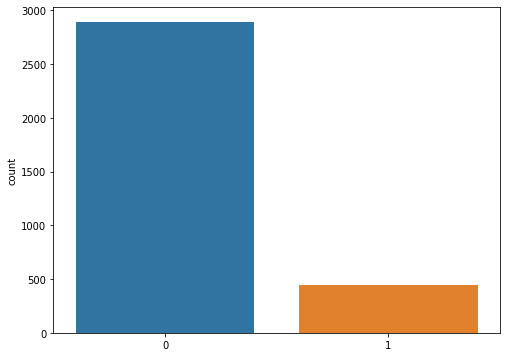

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sergey\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-47-648bed5b16ed>", line 6, in insertText
    df_new = preprocess_data(file_name)
  File "<ipython-input-44-14e1f3135ea6>", line 10, in preprocess_data
    df = pd.read_csv(file)
  File "C:\Users\Sergey\AppData\Roaming\Python\Python37\site-packages\pandas\io\parsers.py", line 610, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Sergey\AppData\Roaming\Python\Python37\site-packages\pandas\io\parsers.py", line 462, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Sergey\AppData\Roaming\Python\Python37\site-packages\pandas\io\parsers.py", line 819, in __init__
    self._engine = self._make_engine(self.engine)
  File "C:\Users\Sergey\AppData\Roaming\Python\Python37\site-packages\pandas\io\parsers.py", line 1050, in _make_engine
    return m

In [47]:
from tkinter import *
from tkinter import filedialog as fd

def insertText():
    file_name = fd.askopenfilename(title = "Выберите файлы")
    df_new = preprocess_data(file_name)
    y_pred = predict(df_new)
    text.insert(1.0, pd.Series(y_pred))
    SAVING_PATH = fd.asksaveasfile(mode = "w", defaultextension = ".csv", title = "Сохранить результаты")
    pd.Series(y_pred).to_csv(SAVING_PATH, index = False)
    plt.figure(figsize = (8,6))
    sns.countplot(pd.Series(y_pred))
    plt.show()

def new():
    root_2 = Toplevel()
    text_2 = Text()
    text_2.grid(columnspan = 2)
    button = Button("Нажмите", command = insertText).grid(columnspan = 2)
    root_2.mainloop()
    
def close():
    root.destroy()
    
    
root = Tk()

root.minsize(325,200)

mainmenu = Menu(root)
root.config(menu = mainmenu)


filemenu = Menu(mainmenu)
filemenu.add_command(label = "Открыть файл", command = insertText)
filemenu.add_command(label = "Новый", command = new)
filemenu.add_command(label = "Выход", command = close)


helpmenu = Menu(mainmenu)
helpmenu.add_command(label = "Помощь")
helpmenu.add_command(label = "О программе")

mainmenu.add_cascade(label = "Файл", menu = filemenu)
mainmenu.add_cascade(label = "Справка", menu = helpmenu)

text = Text(width = 50, height = 25)
text.grid(columnspan = 2)
button = Button(text = "Нажмите, чтобы \n получить предсказание", command = insertText).grid(columnspan = 2)
root.mainloop()